# Finals Summray 13-15


## Supervised Learning: Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

1. load all the data from the diabetes.csv (with our own header!!)
2. print out all the correlations in the data set (table)
3. print out all the correlations as a heatmap

<AxesSubplot: >

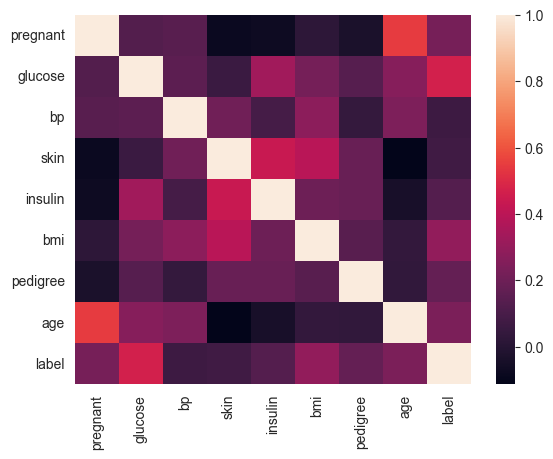

In [9]:
diabetes = pd.read_csv('resources/diabetes.csv', header=0, names=col_names)
corr = diabetes.corr()
sns.heatmap(corr)

4. split the data in X and y and split it then in train and test data

In [13]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

In [14]:
X = diabetes[feature_cols]
y = diabetes.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

5. print how many rows and columns X_train has

In [16]:
X_train.shape

(537, 8)

6. make a decision tree with the gini index
7. predict the test data
8. evaluate the model

In [17]:
dec_tree_classifier = DecisionTreeClassifier(criterion='gini')
dec_tree_classifier = dec_tree_classifier.fit(X_train, y_train)
y_prediction = dec_tree_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_prediction))

0.7272727272727273


9. visualize the found data
10. save found data as a png

In [18]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image

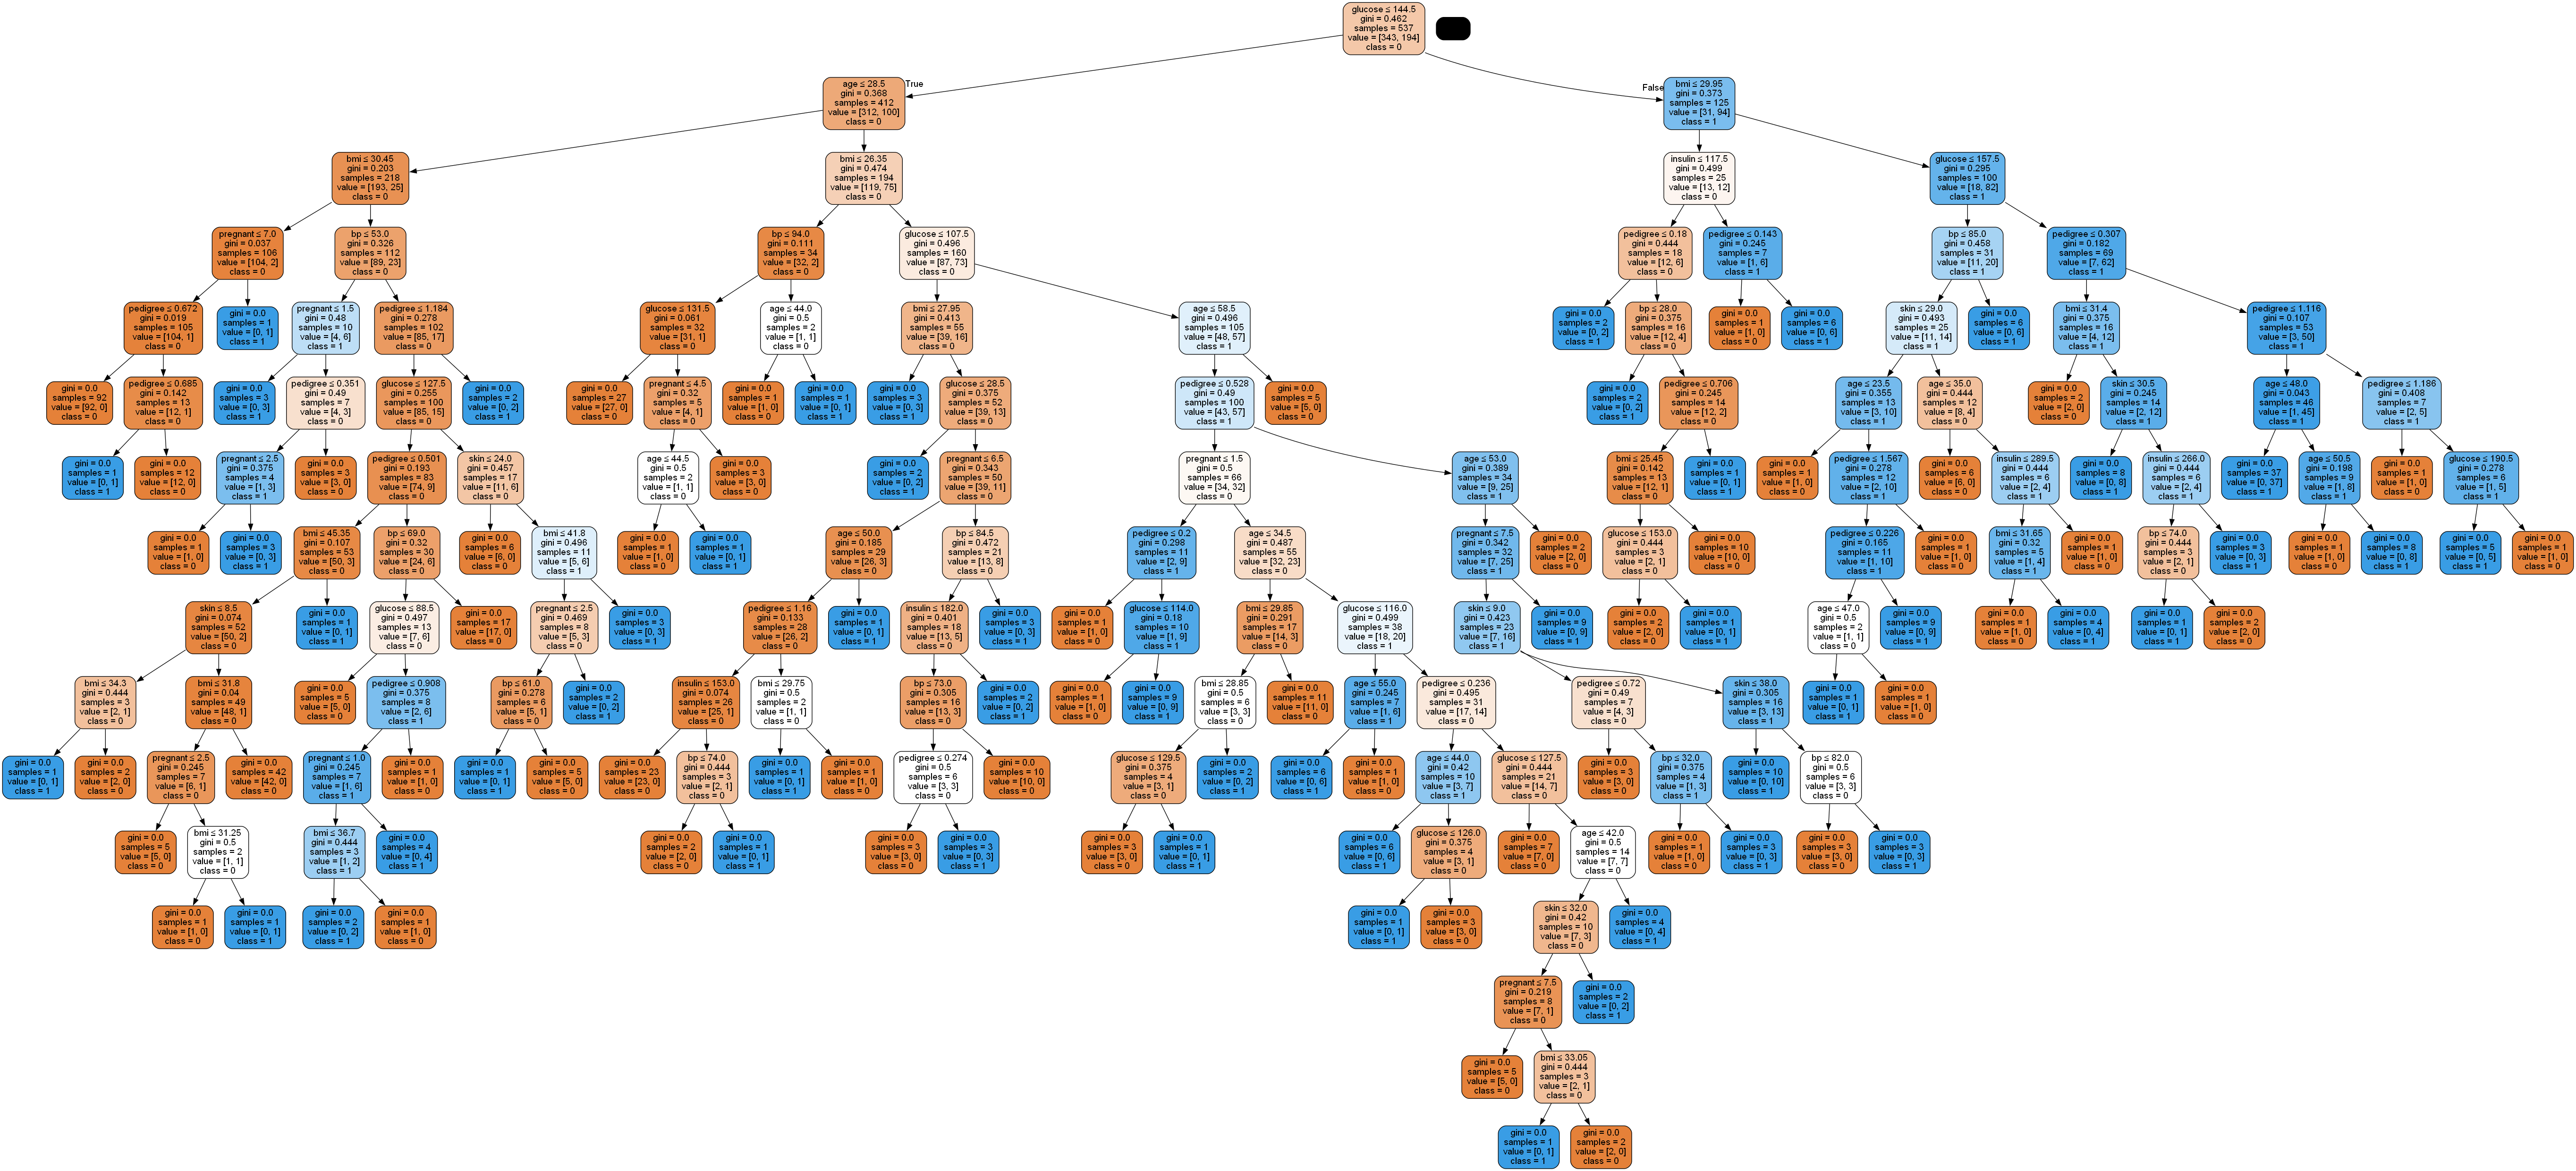

In [19]:
dot_data = StringIO()

export_graphviz(dec_tree_classifier,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

2nd Example - Iris
1. import the iris data set
2. transform the data into a dataframe
3. get X and y
4. split in train and test data
5. do the decision tree
6. print the accuracy score

In [36]:
iris = datasets.load_iris()
irises = pd.DataFrame({
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target
})
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dec_tree_classifier.fit(X_train, y_train)
y_prediction = dec_tree_classifier.predict(X_test)
dec_tree_classifier.score(X_test, y_test)  # print(metrics.accuracy_score(y_test, y_prediction))

0.9777777777777777

7. predict with a random object (e.g., 4,3,5,2)

In [39]:
print(dec_tree_classifier.predict([[4, 3, 5, 2]]))

[2]


8. print out the decision treee

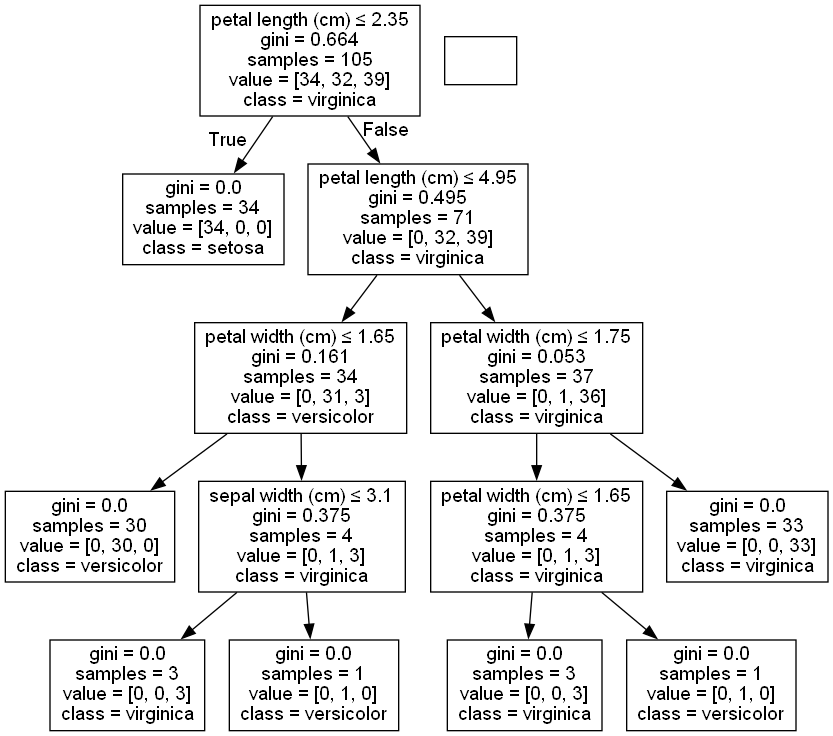

In [41]:
dot_data = StringIO()

export_graphviz(dec_tree_classifier,
                out_file=dot_data,
                special_characters=True,
                feature_names=iris.feature_names,
                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

10. print out the other way ??

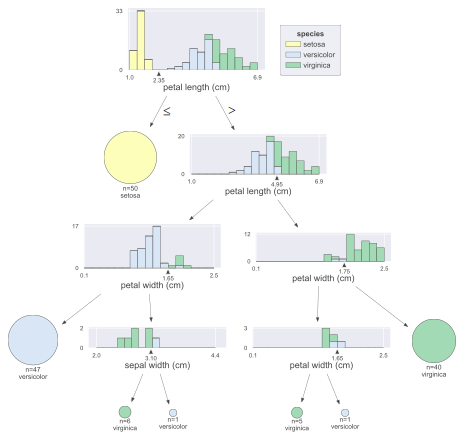

In [45]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dec_tree_classifier,
               iris['data'],
               iris['target'],
               target_name='species',
               feature_names=np.array(iris['feature_names']),
               class_names={0: 'setosa', 1: 'versicolor', 2: 'virginica'})
viz

## Supervised Learning: Random Forest

1. use the same X and y that we used earlier and split it into train and test data
2. do the random forest with the data
3. do the test with the test data and print the accuracy score

In [54]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_prediction = rf.predict(X_test)
metrics.accuracy_score(y_test, y_prediction)

1.0

1.0

4. find out the feature importance
5. print it in a barplot

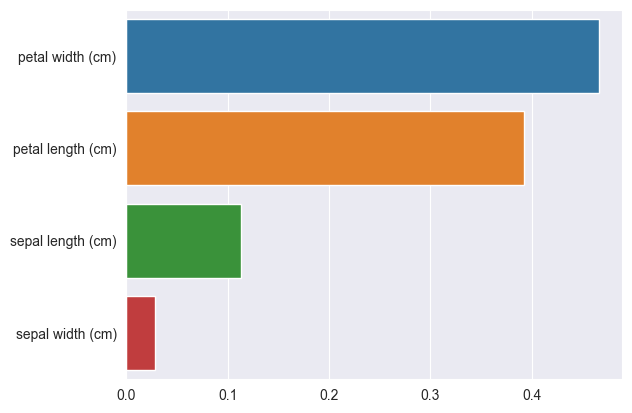

In [58]:
feature_importance = pd.Series(rf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

## Supervised Learning: Unsupervised Learning: K-Means clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

1. import the mall_customers-3.csv
2. rename 'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'
3. print out how many NaN are in the df

In [64]:
mall_customers = pd.read_csv('resources/mall_customers-3.csv')
mall_customers.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'},
                      inplace=True)
mall_customers.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

4. do pairplots in which the data is color-separated by gender

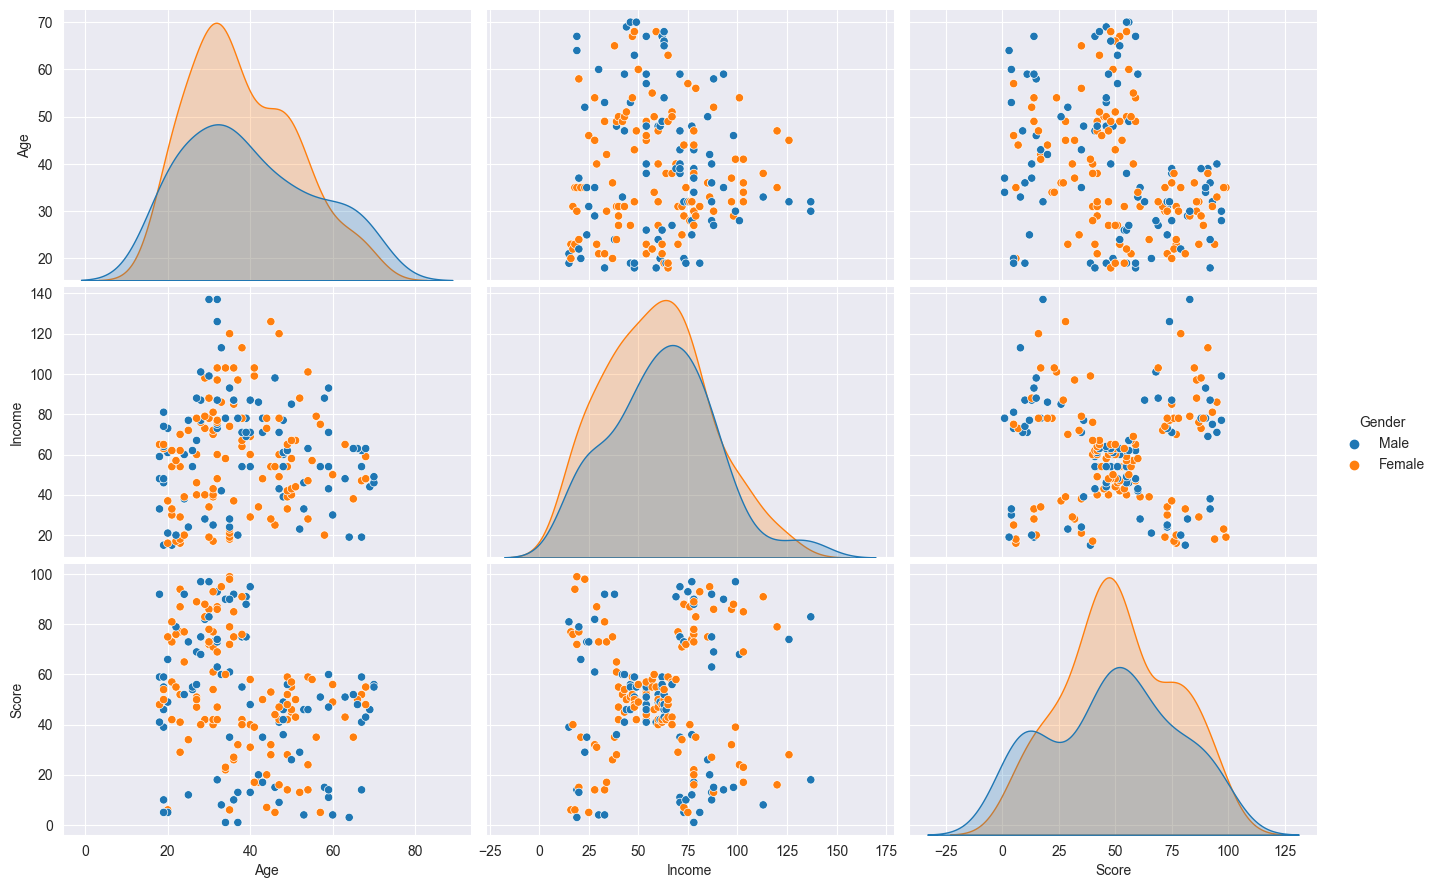

In [69]:
sns.pairplot(mall_customers.drop('CustomerID', axis=1), hue='Gender', height=3, aspect=1.5)

5. for age, income and score do subplots of boxplots with a fitting title

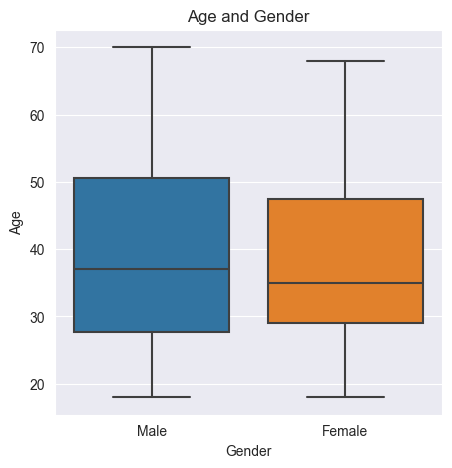

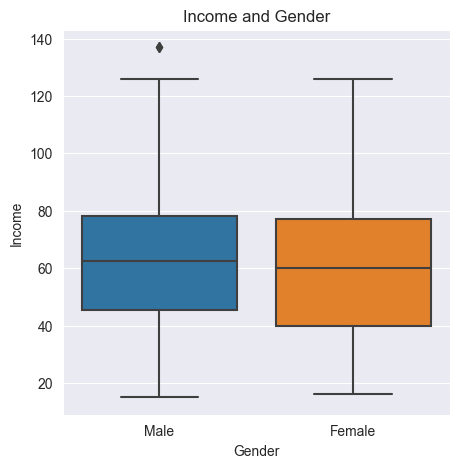

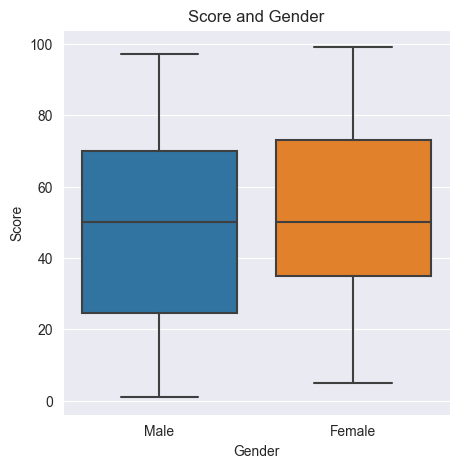

In [71]:
for col in ['Age', 'Income', 'Score']:
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.boxplot(data=mall_customers, x='Gender', y=col, ax=ax)
    ax.set_title(f'{col} and Gender')
    plt.show()

6. calculate the wcss 1 to 11 clusters with kmeans clustering and plot it after to use the elbow method (drop ID and Gender before!)

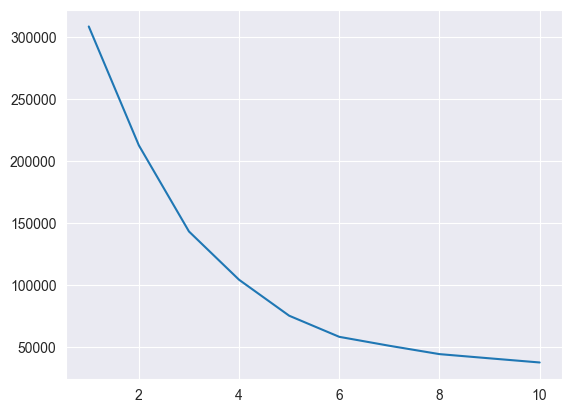

In [78]:
from sklearn.cluster import KMeans
X = mall_customers.drop(['CustomerID', 'Gender'], axis=1)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)

7. use the result to predict the y-kmeans

In [79]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
print(y_kmeans)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


8. plot the clusters with different #cluster and see which fits best

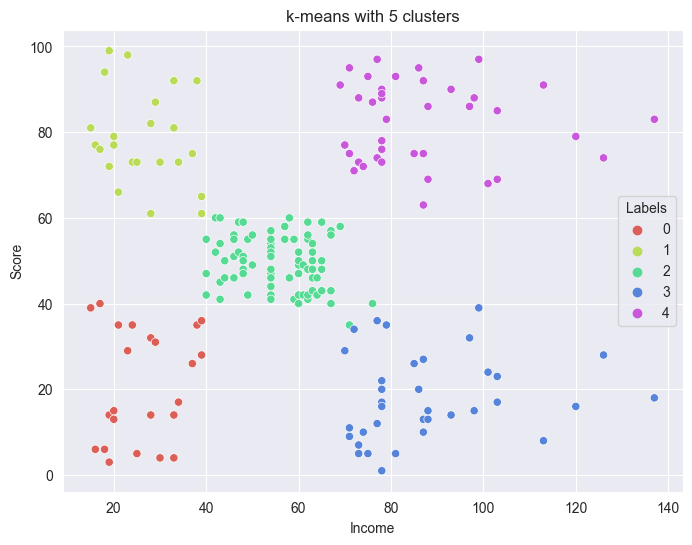

In [80]:
km3 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('k-means with 5 clusters')
plt.show()

9. make two swarmplots about the income and the score with the cluster size that was best

2nd Example - Iris
1. import the iris dataset
2. print the feature names
3. make a data set out of sepal length and the petal length

4. calculate the wcss of #clusters 1 to 11 and use the elbow method to find the best #clusters

5. print the y_kmeans

6. make a scatterplot with different #clusters and find out which one works best